### Problem Set 3
#### MACS 30150, Dr. Evans
#### Due Wednesday, Jan. 30 at 11:30am
#### Haowen Shang

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from mpl_toolkits import mplot3d

#### Exercise 5.1

Please see PDF.

#### Exercise 5.2

Please see PDF.

#### Exercise 5.3

Please see PDF.

The evolvement of $\left \{ c_{t} \right \}_{t=1}^{3}$ and $\left \{ W_{t} \right \}_{t=1}^{4}$ over the three periods shows like following:

([<matplotlib.axis.XTick at 0x116dfc6d8>,
 <a list of 3 Text xticklabel objects>)

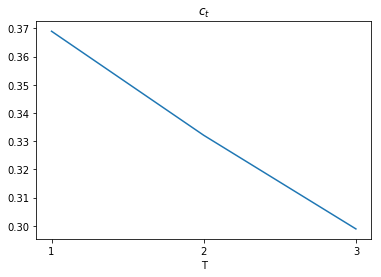

In [2]:
c = [1-171/271, 171/271- 9/19*171/271 , 9/19*171/271]
W = [1, 171/271, 9/19*171/271, 0]
plt.plot([1,2,3], c)
plt.title(r"$c_{t}$")
plt.xlabel('T')
plt.xticks([1,2,3])

([<matplotlib.axis.XTick at 0x1239a8550>,
 <a list of 4 Text xticklabel objects>)

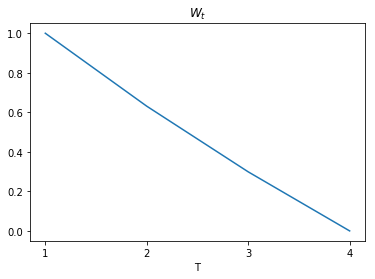

In [3]:
plt.plot([1,2,3,4], W)
plt.title(r"$W_{t}$")
plt.xlabel('T')
plt.xticks([1,2,3,4])

#### Exercise 5.4

Please see PDF.

#### Exercise 5.5

Please see PDF.

#### Exercise 5.6

Please see PDF.

#### Exercise 5.7

Please see PDF.

#### Exercise 5.8

Please see PDF.

#### Exercise 5.9

In [4]:
# Set the vector of discretized cake size:
W_lb = 1e-2
W_ub = 1.0
N = 100
W_vec = np.linspace(W_lb, W_ub, N)
print("The possible cake sizes are:",W_vec)

The possible cake sizes are: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


#### Exercise 5.10

In [5]:
#set parameters
beta = 0.9

In [6]:
#choose a utility function u(c) = log(c)
def utility(c):
    util = np.log(c)
    return util

In [7]:
#initial guess for value function
V_init = np.zeros_like(W_vec)
#Set the vector of discretized cake size for tomorrow
W_prime = np.zeros_like(W_vec)
u_vec = utility(W_vec-W_prime)
#Contraction mapping 
V_T = (u_vec + beta * V_init)
print("The policy function is:", W_prime)
print("The value function is:", V_T)

The policy function is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
The value function is: [-4.60517019 -3.91202301 -3.5065579  -3.21887582 -2.99573227 -2.81341072
 -2.65926004 -2.52572864 -2.40794561 -2.30258509 -2.20727491 -2.12026354
 -2.04022083 -1.96611286 -1.89711998 -1.83258146 -1.77195684 -1.71479843
 -1.66073121 -1.60943791 -1.56064775 -1.51412773 -1.46967597 -1.42711636
 -1.38629436 -1.34707365 -1.30933332 -1.27296568 -1.23787436 -1.2039728
 -1.17118298 -1.13943428 -1.10866262 -1.07880966 -1.04982212 -1.02165125
 -0.99425227 -0.96758403 -0.94160854 -0.91629073 -0.89159812 -0.86750057
 -0.84397007 -0.82098055 -0.7985077  -0.77652879 -0.75502258 -0.73396918
 -0.71334989 -0.69314718 -0.67334455 -0.65392647 -0.63487827 -0.

#### Exercise 5.11

In [8]:
def distance(V_new, V_init):
    dist = ((V_new-V_init)**2).sum()
    return dist

In [9]:
delta1 = distance(V_T, V_init)
print("The distance metric is:", delta1)

The distance metric is: 178.92611065972804


#### Exercise 5.12

In [10]:
#Create utility matrix
c_mat =(np.tile(W_vec.reshape((N, 1)), (1, N))-
             np.tile(W_vec.reshape((1,N)), (N,1)))
c_pos = c_mat >0
c_mat [~c_pos] = 1e-7
u_mat = utility(c_mat)

#Contraction mapping
V_prime = np.tile(V_T.reshape((1,N)), (N,1))
V_prime[~c_pos] = -9e+4
V_Tminus1 = (u_mat + beta * V_prime).max(axis = 1)
W_index = np.argmax(u_mat + beta*V_prime, axis=1)
W_T = W_vec[W_index]
print("The policy function is:", W_T)
print("The value function is:", V_Tminus1)

The policy function is: [0.01 0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07
 0.07 0.08 0.08 0.09 0.09 0.09 0.1  0.1  0.11 0.11 0.12 0.12 0.13 0.13
 0.14 0.14 0.15 0.15 0.16 0.16 0.17 0.17 0.18 0.18 0.18 0.19 0.19 0.2
 0.2  0.21 0.21 0.22 0.22 0.23 0.23 0.24 0.24 0.25 0.25 0.26 0.26 0.27
 0.27 0.27 0.28 0.28 0.29 0.29 0.3  0.3  0.31 0.31 0.32 0.32 0.33 0.33
 0.34 0.34 0.35 0.35 0.36 0.36 0.36 0.37 0.37 0.38 0.38 0.39 0.39 0.4
 0.4  0.41 0.41 0.42 0.42 0.43 0.43 0.44 0.44 0.45 0.45 0.45 0.46 0.46
 0.47 0.47]
The value function is: [-8.10161181e+04 -8.74982335e+00 -8.05667617e+00 -7.43284371e+00
 -7.02737860e+00 -6.66246000e+00 -6.37477793e+00 -6.11586407e+00
 -5.89272052e+00 -5.69189132e+00 -5.50956976e+00 -5.34548036e+00
 -5.19132968e+00 -5.05259407e+00 -4.91906268e+00 -4.79888442e+00
 -4.68110139e+00 -4.57509666e+00 -4.46973614e+00 -4.37442596e+00
 -4.27960150e+00 -4.19259012e+00 -4.10681096e+00 -4.02676825e+00
 -3.94845801e+00 -3.87435004e+00 -3.80231160e+00 -3.7333

In [11]:
delta2 = distance(V_Tminus1, V_T)
print("The distance metric is:", delta2)

The distance metric is: 6562865744.5285635


In [12]:
diff1 = delta2-delta1
print("The difference between delta_{T-1} and delta_T is: ", diff1)

The difference between delta_{T-1} and delta_T is:  6562865565.602453


delta_{T-1} is bigger than delta_T, which means distance gets lager from T to T-1.

#### Exercise 5.13

In [13]:
# Perform the contraction on V_T −1
V_prime = np.tile(V_Tminus1.reshape((1,N)), (N,1))
V_prime[~c_pos] = -9e+4
V_Tminus2 = (u_mat + beta * V_prime).max(axis = 1)
W_index = np.argmax(u_mat + beta*V_prime, axis=1)
W_Tminus1 = W_vec[W_index] 
print("The policy function is:", W_Tminus1)
print("The value function is:", V_Tminus2)

The policy function is: [0.01 0.01 0.02 0.02 0.03 0.04 0.04 0.05 0.06 0.06 0.07 0.08 0.08 0.09
 0.09 0.1  0.11 0.11 0.12 0.13 0.13 0.14 0.15 0.15 0.16 0.17 0.17 0.18
 0.18 0.19 0.19 0.2  0.21 0.21 0.22 0.23 0.23 0.24 0.25 0.25 0.26 0.27
 0.27 0.28 0.28 0.29 0.3  0.3  0.31 0.32 0.32 0.33 0.34 0.34 0.35 0.35
 0.36 0.36 0.37 0.38 0.38 0.39 0.4  0.4  0.41 0.42 0.42 0.43 0.44 0.44
 0.45 0.45 0.46 0.47 0.47 0.48 0.49 0.49 0.5  0.51 0.51 0.52 0.52 0.53
 0.54 0.54 0.55 0.55 0.56 0.57 0.57 0.58 0.59 0.59 0.6  0.61 0.61 0.62
 0.63 0.63]
The value function is: [-8.10161181e+04 -7.29191115e+04 -1.24800112e+01 -1.17868640e+01
 -1.11630316e+01 -1.06015823e+01 -1.01961172e+01 -9.83119864e+00
 -9.50277190e+00 -9.21508983e+00 -8.95617596e+00 -8.72315349e+00
 -8.50000993e+00 -8.29918074e+00 -8.11685918e+00 -7.93611290e+00
 -7.77202350e+00 -7.61787282e+00 -7.47019236e+00 -7.33145675e+00
 -7.19792536e+00 -7.07306331e+00 -6.95288505e+00 -6.83510202e+00
 -6.72694159e+00 -6.62093686e+00 -6.51557634e+00 -6.42

In [14]:
delta3 = distance(V_Tminus2, V_Tminus1)
print("The distance metric is:", delta3)

The distance metric is: 5315921432.356884


In [15]:
diff2 = delta3-delta2
print("The difference between delta_{T-2} and delta_{T-1} is: ", diff2)

The difference between delta_{T-2} and delta_{T-1} is:  -1246944312.1716795


In [16]:
diff3 = abs(delta3-delta1)
print("The difference between delta_{T-2} and delta_{T} is: ", diff3)

The difference between delta_{T-2} and delta_{T} is:  5315921253.430774


delta_{T-2} is smaller than delta_{T-1} and delta_{T-2} is bigger than delta_T, which means distance gets smaller from T-1 to T-2.

#### Exercise 5.14

In [17]:
V_init = np.zeros_like(W_vec)

maxiters = 500
toler = 1e-9
dist = 10.0
VF_iter = 0
W_prime = W_vec
while dist >= toler and VF_iter < maxiters:
    VF_iter += 1
    W = W_prime
    #Contraction mapping 
    V_prime = np.tile(V_init.reshape((1,N)), (N,1))
    V_prime[~c_pos] = -9e+4
    V_new = (u_mat + beta * V_prime).max(axis = 1)
    W_index = np.argmax(u_mat + beta*V_prime, axis=1)
    W_prime = W_vec[W_index]
    dist =((V_new - V_init)**2).sum()
    V_init = V_new
    print("Iter = ",VF_iter,",distance = ", dist)
    
print("Yay! It converged.")
print("psi(W) is", W_prime)
print("V(W) is", V_init)
print("After {} times of iterations, V(W) converged.".format(VF_iter))

Iter =  1 ,distance =  6563611570.214573
Iter =  2 ,distance =  5316525743.271798
Iter =  3 ,distance =  4306386030.006323
Iter =  4 ,distance =  3488172794.5714226
Iter =  5 ,distance =  2825420037.630621
Iter =  6 ,distance =  2288590282.5590844
Iter =  7 ,distance =  1853758166.5375955
Iter =  8 ,distance =  1501544142.7426846
Iter =  9 ,distance =  1216250776.642259
Iter =  10 ,distance =  985163145.1419044
Iter =  11 ,distance =  797982160.0373642
Iter =  12 ,distance =  646365559.4266962
Iter =  13 ,distance =  523556110.9935629
Iter =  14 ,distance =  424080456.20615387
Iter =  15 ,distance =  343505174.74340343
Iter =  16 ,distance =  278239195.8852569
Iter =  17 ,distance =  225373752.31221965
Iter =  18 ,distance =  182552742.55996224
Iter =  19 ,distance =  147867724.27005062
Iter =  20 ,distance =  119772859.10622115
Iter =  21 ,distance =  97016018.0385953
Iter =  22 ,distance =  78582976.63315375
Iter =  23 ,distance =  63652212.98545916
Iter =  24 ,distance =  51558294.3

Text(0, 0.5, 'Value function')

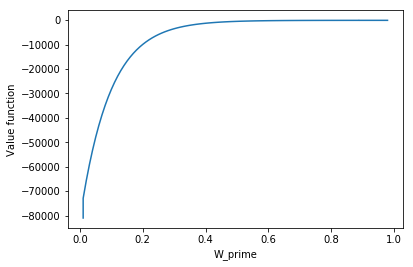

In [18]:
plt.plot(W_prime, V_init)
plt.xlabel("W_prime")
plt.ylabel("Value function")

#### Exercise 5.15

Text(0, 0.5, 'W_prime')

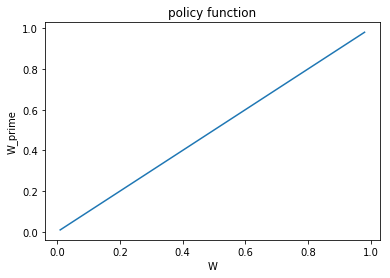

In [19]:
plt.plot(W, W_prime)
plt.title("policy function")
plt.xlabel('W')
plt.ylabel("W_prime")

#### Exercise 5.16

In [20]:
sigma = 0.5
mu = 4*sigma
epsilon_lb = mu - 3*sigma
epsilon_ub = mu + 3*sigma
M = 7
epsilon = np.linspace(epsilon_lb, epsilon_ub, M)

def gamma(x):
    gamma = norm(loc=mu, scale=sigma).pdf(x)
    return gamma

gamma = gamma(epsilon)
print("The epsilon is:", epsilon)
print("The probability distribution is:", gamma)

The epsilon is: [0.5 1.  1.5 2.  2.5 3.  3.5]
The probability distribution is: [0.0088637  0.10798193 0.48394145 0.79788456 0.48394145 0.10798193
 0.0088637 ]


#### Exercise 5.17

In [21]:
#Set a vetor of discretized cake sizes
W_lb = 1e-2
W_ub = 1.0
N = 100
W_vec = np.linspace(W_lb, W_ub, N)
print("The possible cake sizes are:",W_vec)

The possible cake sizes are: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [22]:
# Create utility matrix 
c_mat = (np.tile(W_vec.reshape((N,1)), (1,N)) 
         - np.tile(W_vec.reshape((1,N)), (N,1)))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-7 
u_mat = utility(c_mat)
# Create 3-dimensional array
Three_D_array = np.array([u_mat*e for e in epsilon])

V_init = np.zeros((N,M))
EV = (V_init @ gamma).reshape((N,1)) 
EV_mat = np.tile(EV.reshape((1,N)), (N,1))
EV_mat[~c_pos] = -9e+4
EV_TDarray = np.array([EV_mat for i in range(M)])

V_new_TDarray = Three_D_array + beta * EV_TDarray
V_new = np.zeros((N,M))
W_prime = np.zeros((N,M))
for i in range(N):
    arr = V_new_TDarray[:, i, :]
    V_new[i] = arr.max(axis=1)
    W_index = np.argmax(arr, axis=1)
    W_prime[i] = W_vec[W_index]

print("The policy function is:", W_prime)
print("The value function is:", V_new)

The policy function is: [[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01

#### Exercise 5.18

In [23]:
def distance(V_new, V_init):
    dist = ((V_new-V_init)**2).sum()
    return dist

In [24]:
delta1 = distance(V_new, V_init)
print("The distance metric is:", delta1)

The distance metric is: 45963571196.10551


#### Exercise 5.19

In [25]:
V_init = V_new
EV = (V_init @ gamma).reshape((N,1)) 
EV_mat = np.tile(EV.reshape((1,N)), (N,1))
EV_mat[~c_pos] = -9e+4
EV_TDarray = np.array([EV_mat for e in range(M)])
V_new_TDarray = Three_D_array + beta*EV_TDarray
V_new = np.zeros((N,M))
W_prime = np.zeros((N,M))
for i in range(N):
    arr = V_new_TDarray[:, i, :]
    V_new[i] = arr.max(axis=1)
    W_index = np.argmax(arr, axis=1)
    W_prime[i] = W_vec[W_index]
    
print("The policy function is:", W_prime)
print("The value function is:", V_new)

The policy function is: [[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.04 0.03 0.03 0.03]
 [0.05 0.05 0.04 0.04 0.04 0.04 0.04]
 [0.06 0.06 0.05 0.05 0.05 0.04 0.04]
 [0.07 0.06 0.06 0.05 0.05 0.05 0.05]
 [0.08 0.07 0.07 0.06 0.06 0.05 0.05]
 [0.09 0.08 0.07 0.07 0.06 0.06 0.06]
 [0.1  0.09 0.08 0.07 0.07 0.06 0.06]
 [0.11 0.1  0.09 0.08 0.07 0.07 0.07]
 [0.11 0.1  0.09 0.09 0.08 0.08 0.07]
 [0.12 0.11 0.1  0.09 0.09 0.08 0.08]
 [0.13 0.12 0.11 0.1  0.09 0.09 0.08]
 [0.14 0.13 0.12 0.11 0.1  0.09 0.09]
 [0.15 0.14 0.12 0.11 0.1  0.1  0.09]
 [0.16 0.14 0.13 0.12 0.11 0.1  0.1 ]
 [0.17 0.15 0.14 0.13 0.12 0.11 0.1 ]
 [0.18 0.16 0.14 0.13 0.12 0.11 0.11]
 [0.19 0.17 0.15 0.14 0.13 0.12 0.11]
 [0.19 0.17 0.16 0.14 0.13 0.12 0.12]
 [0.2  0.18 0.17 0.15 0.14 0.13 0.12]
 [0.21 0.19 0.17 0.16 0.15 0.14 0.13]
 [0.22 0.2  0.18 0.16 0.15 0.14 0.13]
 [0.23 0.21 0.19 0.17 0.16

In [26]:
delta2 = distance(V_init, V_new)
print("The distance metric is:", delta2)

The distance metric is: 45953155651.859604


In [27]:
diff2= delta2-delta1
print("The difference between delta_{T-1} and delta_T is: ", diff2)

The difference between delta_{T-1} and delta_T is:  -10415544.245903015


delta_{T-1} is smaller than delta_T, which means distance gets smaller from T to T-1.

#### Exercise 5.20

In [28]:
V_init = V_new
EV = (V_init @ gamma).reshape((N,1))
EV_mat = np.tile(EV.reshape((1,N)), (N,1))
EV_mat[~c_pos] = -9e+4
EV_TDarray = np.array([EV_mat for i in range(M)]) 
V_new_TDarray = Three_D_array + beta*EV_TDarray
V_new = np.zeros((N,M))
W_prime = np.zeros((N,M))
for i in range(N):
    arr = V_new_TDarray[:, i, :]
    V_new[i] = arr.max(axis=1)
    W_index = np.argmax(arr, axis=1)
    W_prime[i] = W_vec[W_index]

print("The policy function is:", W_prime)
print("The value function is:", V_new)

The policy function is: [[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.06 0.06 0.06 0.06 0.06 0.06 0.05]
 [0.07 0.07 0.07 0.07 0.07 0.06 0.06]
 [0.08 0.08 0.08 0.08 0.07 0.07 0.07]
 [0.09 0.09 0.09 0.08 0.08 0.08 0.08]
 [0.1  0.1  0.1  0.09 0.09 0.09 0.08]
 [0.11 0.11 0.11 0.1  0.1  0.09 0.09]
 [0.12 0.12 0.11 0.11 0.11 0.1  0.1 ]
 [0.13 0.13 0.12 0.12 0.11 0.11 0.11]
 [0.14 0.14 0.13 0.13 0.12 0.12 0.11]
 [0.15 0.15 0.14 0.14 0.13 0.13 0.12]
 [0.16 0.15 0.15 0.14 0.14 0.13 0.13]
 [0.17 0.16 0.16 0.15 0.15 0.14 0.14]
 [0.18 0.17 0.17 0.16 0.15 0.15 0.14]
 [0.19 0.18 0.18 0.17 0.16 0.16 0.15]
 [0.2  0.19 0.18 0.18 0.17 0.16 0.16]
 [0.21 0.2  0.19 0.18 0.18 0.17 0.17]
 [0.22 0.21 0.2  0.19 0.19 0.18 0.17]
 [0.23 0.22 0.21 0.2  0.19 0.19 0.18]
 [0.24 0.23 0.22 0.21 0.2  0.2  0.19]
 [0.25 0.24 0.23 0.22 0.21

In [29]:
delta3 = distance(V_init, V_new)
print("The distance metric is:", delta3)

The distance metric is: 45934472596.166245


In [30]:
diff3 = delta3-delta2
print("The difference between delta_{T-2} and delta_{T-1} is: ", diff3)

The difference between delta_{T-2} and delta_{T-1} is:  -18683055.693359375


In [31]:
diff4 = delta3-delta1
print("The difference between delta_{T-2} and delta_{T-1} is: ", diff4)

The difference between delta_{T-2} and delta_{T-1} is:  -29098599.93926239


delta_{T-2} is smaller than delta_{T-1} and delta_{T-2} is much smaller than delta_T, Which means distance gets smaller from T-1 to T-2.

#### Exercise 5.21

In [32]:
maxiters = 500
toler = 1e-9
delta = 10.0
VF_iter = 0
V_init = np.zeros((N,M))

while delta>toler and VF_iter<maxiters:
    VF_iter += 1
    EV = (V_init @ gamma).reshape((N,1)) 
    EV_mat = np.tile(EV.reshape((1,N)), (N,1))
    EV_mat[~c_pos] = -9e+4
    EV_TDarray = np.array([EV_mat for e in range(M)])
    V_new_TDarray = Three_D_array + beta*EV_TDarray
    V_new = np.zeros((N,M))
    W_prime = np.zeros((N,M))
    for i in range(N):
        arr = V_new_TDarray[:, i, :]
        V_new[i] = arr.max(axis=1)
        W_index = np.argmax(arr, axis=1)
        W_prime[i] = W_vec[W_index]
    delta = distance(V_init, V_new)
    V_init = V_new
    print('Iter=', VF_iter, ', distance= ', delta)
    
print("Yay! It converged.")
print("psi(W) is", W_prime)
print("V(W) is", V_init)
print("After {} times of iterations, V(W) converged.".format(VF_iter))

Iter= 1 , distance=  45963571196.10551
Iter= 2 , distance=  45953155651.859604
Iter= 3 , distance=  45934472596.166245
Iter= 4 , distance=  45901033774.70888
Iter= 5 , distance=  45841440579.44991
Iter= 6 , distance=  45736060684.31199
Iter= 7 , distance=  45552402370.20611
Iter= 8 , distance=  45241165831.95568
Iter= 9 , distance=  44743295702.61597
Iter= 10 , distance=  44048017695.89585
Iter= 11 , distance=  43443854297.730034
Iter= 12 , distance=  44442974185.644424
Iter= 13 , distance=  52967967667.04762
Iter= 14 , distance=  89997648384.71588
Iter= 15 , distance=  226554825804.06644
Iter= 16 , distance=  457375601904.8917
Iter= 17 , distance=  192167632805.63055
Iter= 18 , distance=  0.0
Yay! It converged.
psi(W) is [[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.06 0.06 0.06 0.06 0.06 0.06 0.06]
 [0.07 0.07 0.07 0.07 0.07 0.07 0.07]
 [

#### Exercise 5.22

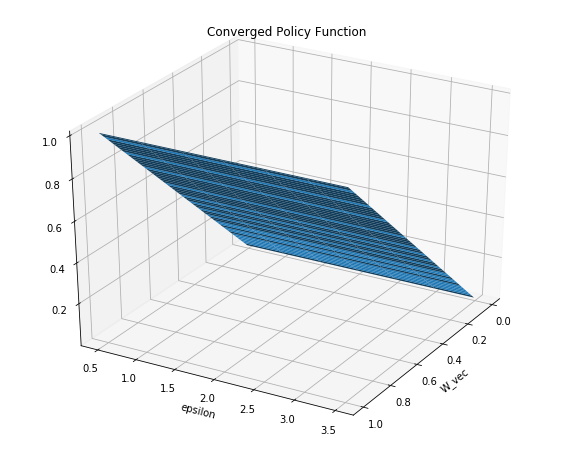

In [33]:
X, Y = np.meshgrid(W_vec, epsilon)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.T, Y.T, W_prime)
ax.set_xlabel('W_vec')
ax.set_ylabel('epsilon')
ax.set_title('Converged Policy Function')
ax.view_init(elev=30,azim=30)
plt.show()